##Fetching Data

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pavansaish","key":"56908f4d1ebb1df994384ca45dabedc9"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                                   title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                                 Data Science Salaries 2023 💸                      25KB  2023-04-13 09:55:16          38371       1089  1.0              
tawfikelmetwally/automobile-dataset                                   Car information dataset                            6KB  2023-05-28 18:26:48           6293        162  0.9411765        
fatihb/coffee-quality-data-cqi                                        Coffee Quality Data (CQI May-2023)                22KB  2023-05-12 13:06:39           7955        167  1.0              
mohithsairamreddy/salary-data                

In [ ]:
! kaggle datasets download jessicali9530/celeba-dataset

100% 1.33G/1.33G [00:12<00:00, 76.1MB/s]
100% 1.33G/1.33G [00:12<00:00, 111MB/s] 


In [ ]:
! mkdir train

In [ ]:
! unzip celeba-dataset.zip -d train  #Enter the zip file name

Streaming output truncated to the last 5000 lines.
  inflating: train/img_align_celeba/img_align_celeba/197604.jpg  
  inflating: train/img_align_celeba/img_align_celeba/197605.jpg  
  inflating: train/img_align_celeba/img_align_celeba/197606.jpg  
  inflating: train/img_align_celeba/img_align_celeba/197607.jpg  
  inflating: train/img_align_celeba/img_align_celeba/197608.jpg  
  inflating: train/img_align_celeba/img_align_celeba/197609.jpg  
  inflating: train/img_align_celeba/img_align_celeba/197610.jpg  
  inflating: train/img_align_celeba/img_align_celeba/197611.jpg  
  inflating: train/img_align_celeba/img_align_celeba/197612.jpg  
  inflating: train/img_align_celeba/img_align_celeba/197613.jpg  
  inflating: train/img_align_celeba/img_align_celeba/197614.jpg  
  inflating: train/img_align_celeba/img_align_celeba/197615.jpg  
  inflating: train/img_align_celeba/img_align_celeba/197616.jpg  
  inflating: train/img_align_celeba/img_align_celeba/197617.jpg  
  inflating: train/img_al

In [ ]:
import numpy as np
import pandas as pd
import PIL
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D


###Setting paths

In [ ]:
# Define the path to the datasets
landmarks_csv_path = "/content/train/list_landmarks_align_celeba.csv"
images_folder_path = "/content/train/img_align_celeba/img_align_celeba"

# Select a subset of images
num_images = 10000

# Original image dimensions
original_width = 178
original_height = 218

# New image dimensions
new_width = 100
image_aspect_ratio = original_width / original_height
new_height = int(image_aspect_ratio * new_width)

# Image sizes
original_image_size = (original_width, original_height)
new_image_size = (new_width, new_height)

# Image size used for training
training_image_size = new_image_size

In [ ]:
# load the dataset (key points)
dataframe = pd.read_csv(landmarks_csv_path)
dataframe = dataframe[:num_images]

In [ ]:
dataframe

,image_id,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
0,000001.jpg,69,109,106,113,77,142,73,152,108,154
1,000002.jpg,69,110,107,112,81,135,70,151,108,153
2,000003.jpg,76,112,104,106,108,128,74,156,98,158
3,000004.jpg,72,113,108,108,101,138,71,155,101,151
4,000005.jpg,66,114,112,112,86,119,71,147,104,150
...,...,...,...,...,...,...,...,...,...,...,...
9995,009996.jpg,70,111,107,111,89,126,74,152,103,153
9996,009997.jpg,68,111,108,112,80,138,70,152,108,151
9997,009998.jpg,69,112,108,112,78,133,73,151,104,152
9998,009999.jpg,69,112,108,111,90,133,72,152,104,152


##Images ➡️ array

In [ ]:
images_data = list()
for i in range(dataframe.shape[0]):
    # Retrieving the path based upon the index
    path = "{}/{}".format(str(images_folder_path),str(dataframe.iloc[i].image_id))

    # Reading images using PIL library
    image = PIL.Image.open(path).resize(training_image_size)
    image_array = np.asarray(image) / 255

    # Appending the images to a list
    images_data.append(image_array)

# Converting images_data to an array from list
images_data = np.array(images_data)

In [ ]:
images_data[0]

array([[[0.99215686, 0.90588235, 0.76078431],
        [0.99215686, 0.90588235, 0.76078431],
        [0.99215686, 0.90588235, 0.76078431],
        ...,
        [0.96470588, 0.89803922, 0.7372549 ],
        [0.99215686, 0.91764706, 0.88627451],
        [0.99607843, 0.93333333, 0.87058824]],

       [[0.99215686, 0.90588235, 0.76078431],
        [0.99215686, 0.90588235, 0.76078431],
        [0.99215686, 0.90588235, 0.76078431],
        ...,
        [0.98823529, 0.9254902 , 0.78431373],
        [0.98823529, 0.91764706, 0.88235294],
        [0.99607843, 0.93333333, 0.8745098 ]],

       [[0.99215686, 0.90588235, 0.76078431],
        [0.99215686, 0.90588235, 0.76078431],
        [0.99215686, 0.90588235, 0.76078431],
        ...,
        [0.99607843, 0.94509804, 0.84313725],
        [0.98039216, 0.92941176, 0.87843137],
        [0.98431373, 0.9254902 , 0.8627451 ]],

       ...,

       [[0.72941176, 0.48235294, 0.28235294],
        [0.7254902 , 0.47058824, 0.28235294],
        [0.67843137, 0

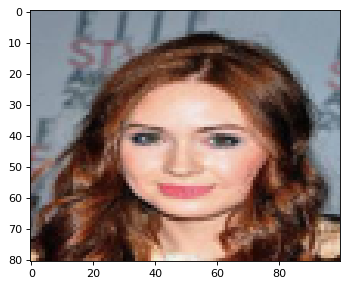

In [ ]:
#Looking into data
plt.figure(figsize=(5, 5), dpi = 80)
plt.imshow(images_data[84])

In [ ]:
dataframe.columns

Index(['image_id', 'lefteye_x', 'lefteye_y', 'righteye_x', 'righteye_y',
       'nose_x', 'nose_y', 'leftmouth_x', 'leftmouth_y', 'rightmouth_x',
       'rightmouth_y'],
      dtype='object')

In [ ]:
print("Images Data Arrays Shape:", images_data.shape) #no of images, height of each image, width of each image, RGB channel
print("Key Points Data Shape:", dataframe.shape) #no of images, no of features

Images Data Arrays Shape: (10000, 81, 100, 3)
Key Points Data Shape: (10000, 11)


In [ ]:
dataframe.describe()

,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,69.350000,111.200200,107.645500,111.164800,87.933500,135.110900,71.244600,152.08370,105.590700,152.212000
std,1.706983,1.143526,1.690892,1.169349,6.665112,4.272988,3.175623,1.78718,3.249558,1.742114
min,60.000000,99.000000,90.000000,101.000000,59.000000,104.000000,60.000000,144.00000,91.000000,139.000000
25%,68.000000,111.000000,107.000000,111.000000,84.000000,133.000000,69.000000,151.00000,103.000000,151.000000
50%,69.000000,111.000000,108.000000,111.000000,88.000000,135.000000,72.000000,152.00000,105.000000,152.000000
75%,70.000000,112.000000,109.000000,112.000000,92.000000,138.000000,73.000000,153.00000,108.000000,153.000000
max,85.000000,121.000000,121.000000,117.000000,120.000000,150.000000,87.000000,166.00000,116.000000,170.000000


In [ ]:
# function to read images based on index
def image_array_indexbased(index, size=training_image_size, path=images_folder_path):
    """
    This functions is for converting images to arrays to deal with it in the model.

    Input:  index of the image that we want to convert to array
            size of the image that we want for the array of the image
            path of the images data to get the image

    Output: the image array as numpy array
    """
    # to get the path based on index
    path = "{}/{}".format(str(path),str(dataframe.iloc[index].image_id))

    # to read the image
    image = PIL.Image.open(path).resize(size)
    image_array = np.asarray(image)

    return image_array

In [ ]:
# function to get a list of all key points of the face
def face_key_points(index, df = dataframe):
    """
    This function for getting the key points on the face as list to deal with it in plotting sections
    """
    # box dictionary
    points_list = [df.iloc[index].lefteye_x, df.iloc[index].lefteye_y,
                   df.iloc[index].righteye_x, df.iloc[index].righteye_y,
                   df.iloc[index].nose_x, df.iloc[index].nose_y,
                   df.iloc[index].leftmouth_x, df.iloc[index].leftmouth_y,
                   df.iloc[index].rightmouth_x, df.iloc[index].rightmouth_y]

    return points_list

In [ ]:
# function to plot the image with green box around the faces
def plot_image_with_boundaries(index, df = dataframe, size = original_image_size):
    """
    This function for plotting the image with points on facial features and box around the face
    """
    test_image = image_array_indexbased(index, size)
    points_list = face_key_points(index, df)

    # face points
    lefteye_x, lefteye_y, righteye_x, righteye_y = points_list[0], points_list[1], points_list[2], points_list[3]
    nose_x, nose_y = points_list[4], points_list[5]
    leftmouth_x, leftmouth_y, rightmouth_x, rightmouth_y = points_list[6], points_list[7], points_list[8], points_list[9]

    # Create figure and axes
    fig, ax = plt.subplots()
    # plot the image
    ax.imshow(test_image)

    # plot the box around the face
    width = abs(lefteye_x - rightmouth_x - 65)
    height = abs(lefteye_y - rightmouth_y - 75)
    rect = patches.Rectangle((lefteye_x - 30, lefteye_y - 40), width, height, linewidth=4, edgecolor='g', facecolor='none')
    ax.add_patch(rect);

In [ ]:
dataframe.loc[1].to_frame().T

,image_id,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
1,000002.jpg,69,110,107,112,81,135,70,151,108,153


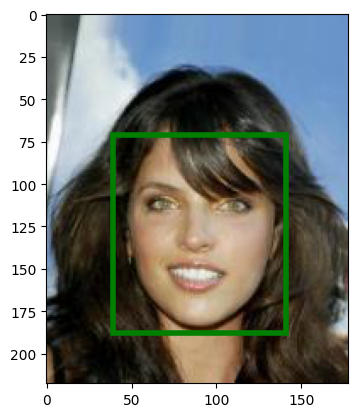

In [ ]:
#plotting the image with facial key points
plot_image_with_boundaries(456)

In [ ]:
# copy a version from the data to prepare it for analysis
df = dataframe.copy()

# check
df.head(3)

,image_id,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
0,000001.jpg,69,109,106,113,77,142,73,152,108,154
1,000002.jpg,69,110,107,112,81,135,70,151,108,153
2,000003.jpg,76,112,104,106,108,128,74,156,98,158


In [ ]:
def rescale_key_points(old_size=original_image_size, new_size=new_image_size):

    """
    This function is for rescaling the key points from the original scale to a new scale and reducing
    the image size to optimize analysis speed and memory usage.
    """
    # Extract old and new sizes (x, y) values
    old_x, old_y = old_size[0], old_size[1]
    new_x, new_y = new_size[0], new_size[1]

    # Calculate ratios for rescaling
    x_ratio = new_x / old_x
    y_ratio = new_y / old_y

    # Define key point column names for x and y coordinates
    key_points_x = ['lefteye_x', 'righteye_x', 'nose_x', 'leftmouth_x', 'rightmouth_x']
    key_points_y = ['lefteye_y', 'righteye_y', 'nose_y', 'leftmouth_y', 'rightmouth_y']

    # Rescale the key points based on the new image size
    df[key_points_x] = (df[key_points_x] * x_ratio).astype('int')
    df[key_points_y] = (df[key_points_y] * y_ratio).astype('int')

# Call the function
rescale_key_points()

# Check the updated DataFrame
df.head()

,image_id,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
0,000001.jpg,38,40,59,41,43,52,41,56,60,57
1,000002.jpg,38,40,60,41,45,50,39,56,60,56
2,000003.jpg,42,41,58,39,60,47,41,57,55,58
3,000004.jpg,40,41,60,40,56,51,39,57,56,56
4,000005.jpg,37,42,62,41,48,44,39,54,58,55


##Dividing the dataset

In [ ]:
X = images_data
y = df

train_images, test_images, train_labels, test_labels = train_test_split(X, y, test_size = 0.3, random_state = 42)

y_train = train_labels.drop(["image_id"], axis=1)
y_test = test_labels.drop(["image_id"], axis=1)

X_test = test_images
X_train = train_images

#Creating validation dataset
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

In [ ]:
y_test.shape[1] # No of neurons in output layer

10

In [ ]:
training_image_size[0], training_image_size[1]

(100, 81)

##Building Neural Network

In [ ]:
"""# diminsions of the image in the traing process
x_dim = training_image_size[0]
y_dim = training_image_size[1]

# build the model
model = Sequential([
    Conv2D(filters = 8, kernel_size = (3, 3), padding = 'same', activation = 'relu', input_shape = (y_dim, x_dim, 3)),
    Conv2D(filters = 8, kernel_size = (3, 3), padding ='same', activation = 'relu'),
    MaxPooling2D(pool_size = 2),
    Dropout(0.2),

    Conv2D(filters = 16, kernel_size = (3, 3), padding = 'same', activation = 'relu'),
    Conv2D(filters = 16, kernel_size = (3, 3), padding = 'same', activation = 'relu'),
    MaxPooling2D(pool_size = 2),
    Dropout(0.2),

    Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu'),
    Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu'),
    MaxPooling2D(pool_size = 2),
    Dropout(0.2),

    Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu'),
    MaxPooling2D(pool_size = 2),
    Dropout(0.2),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dropout(0.2),

    Dense(32, activation = 'relu'),
    Dropout(0.2),

    Dense(16, activation = 'relu'),
    Dropout(0.2),

    Dense(10, activation = 'relu')
])"""

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import RMSprop

# diminsions of the image in the traing process
x_dim = training_image_size[0]
y_dim = training_image_size[1]

# build the model
model = Sequential([
    Conv2D(filters = 8, kernel_size = (3, 3), padding = 'same', activation = 'relu', input_shape = (y_dim, x_dim, 3)),
    Conv2D(filters = 8, kernel_size = (3, 3), padding ='same', activation = 'relu'),
    MaxPooling2D(pool_size = 2),
    Dropout(0.2),

    Conv2D(filters = 16, kernel_size = (3, 3), padding = 'same', activation = 'relu'),
    Conv2D(filters = 16, kernel_size = (3, 3), padding = 'same', activation = 'relu'),
    MaxPooling2D(pool_size = 2),
    Dropout(0.2),

    Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu'),
    Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu'),
    MaxPooling2D(pool_size = 2),
    Dropout(0.2),

    Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu'),
    MaxPooling2D(pool_size = 2),
    Dropout(0.2),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dropout(0.2),

    Dense(32, activation = 'relu'),
    Dropout(0.2),

    Dense(16, activation = 'relu'),
    Dropout(0.2),

    Dense(10, activation = 'relu')
])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 81, 100, 8)        224       
                                                                 
 conv2d_22 (Conv2D)          (None, 81, 100, 8)        584       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 40, 50, 8)        0         
 g2D)                                                            
                                                                 
 dropout_21 (Dropout)        (None, 40, 50, 8)         0         
                                                                 
 conv2d_23 (Conv2D)          (None, 40, 50, 16)        1168      
                                                                 
 conv2d_24 (Conv2D)          (None, 40, 50, 16)        2320      
                                                      

In [ ]:
# Define weight decay
weight_decay = 0.0001

# Define RMSprop optimizer with weight decay
optimizer = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=weight_decay)
model.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics = ["mae"])

In [ ]:
training_history = model.fit(X_train, y_train, epochs = 50,
                             validation_data = (X_val, y_val), batch_size = 4, shuffle = True)

In [ ]:
model.evaluate(X_test, y_test)

47/47 [==============================] - 7s 144ms/step - loss: 2.8545 - mae: 1.1043


[2.8545289039611816, 1.1042790412902832]

In [ ]:
print(original_image_size[0])
print(training_image_size[0])
print(original_image_size[1])
print(training_image_size[1])

178
100
218
81


In [ ]:
def predictions_test_model(index):
    # Load the image
    img = tf.keras.preprocessing.image.load_img("{}/0{}.jpg".format(images_folder_path, index), target_size=(y_dim, x_dim, 3))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img / 255

    # Make predictions using the model
    pred_points = model.predict(img.reshape(1, y_dim, x_dim, 3)).astype('int')[0]

    # Convert key points values to the original size
    x_ratio = 1.05 * (original_image_size[0] / training_image_size[0])
    y_ratio = 1.085 * (original_image_size[1] / training_image_size[1])

    """
    In the previous ratios, we multiply them by a constant to reduce the noise that occurred when we rescaled the points in
    the previous training. There is no specific meaning for these numbers i.e, they are chosen through experimentation.
    """

    pred_points[0] = int(pred_points[0] * x_ratio)
    pred_points[2] = int(pred_points[2] * x_ratio)
    pred_points[4] = int(pred_points[4] * x_ratio)
    pred_points[6] = int(pred_points[6] * x_ratio)
    pred_points[8] = int(pred_points[8] * x_ratio)

    pred_points[1] = int(pred_points[1] * y_ratio)
    pred_points[3] = int(pred_points[3] * y_ratio)
    pred_points[5] = int(pred_points[5] * y_ratio)
    pred_points[7] = int(pred_points[7] * y_ratio)
    pred_points[9] = int(pred_points[9] * y_ratio)

    return pred_points

In [ ]:
def test_image_with_box_plot(index, pred_or_actual = 'pred', pointsColor='bo-' ,boxcolor='g'):
    img = tf.keras.preprocessing.image.load_img("{}/0{}.jpg".format(images_folder_path, index),target_size=(original_height, original_width,3))
    img = tf.keras.preprocessing.image.img_to_array(img)
    test_image = img/255

    # predictions of key points on the face
    if pred_or_actual == 'pred':
        points_list = predictions_test_model(index)        # Model Predections

    elif pred_or_actual == 'actual':
        points_list = face_key_points(index)   # Actual labels of test data

    # face points
    le_x, le_y, re_x, re_y = points_list[0], points_list[1], points_list[2], points_list[3]
    n_x, n_y = points_list[4], points_list[5]
    lm_x, lm_y, rm_x, rm_y = points_list[6], points_list[7], points_list[8], points_list[9]

    # Create figure and axes
    fig, ax = plt.subplots()
    # plot the image
    ax.imshow(test_image)

    # plot the box around the face
    pred_width = abs(le_x - rm_x - 60)
    pred_height = abs(le_y - rm_y - 75)
    rect = patches.Rectangle((le_x - 30, le_y - 40), pred_width, pred_height, linewidth = 5, edgecolor = boxcolor, facecolor = 'none')
    ax.add_patch(rect);

    return points_list

RED box for predections

1/1 [==============================] - 0s 83ms/step


array([ 71, 116, 110, 116,  89, 143,  72, 160, 108, 160])

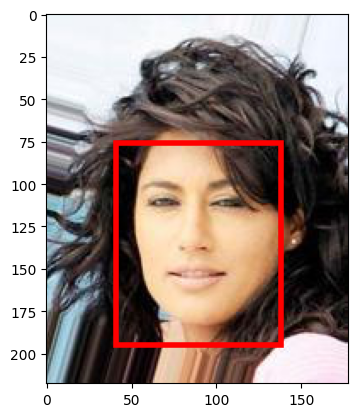

In [ ]:
# Using the model to predict a sample image which doesn't exist in train,test,or validation data

index = 34119
print('RED box for predections\n')

test_image_with_box_plot(index, pred_or_actual = 'pred', pointsColor = 'mo-' , boxcolor = 'r')

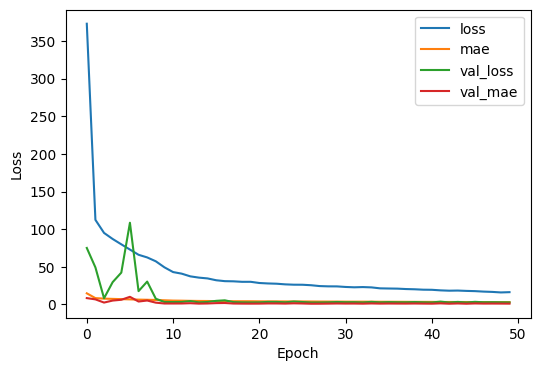

In [ ]:
metric_keys = list(training_process.history.keys())
plt.figure(figsize=(6, 4))

plt.plot(training_process.history[metric_keys[0]], label=metric_keys[0])
plt.plot(training_process.history[metric_keys[1]], label=metric_keys[1])

plt.plot(training_process.history[metric_keys[2]], label=metric_keys[2])
plt.plot(training_process.history[metric_keys[3]], label=metric_keys[3])

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
model.save("model.h5")